In [44]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [45]:
data=pd.read_csv(r'C:\Users\ATHUL AKSHAY\Desktop\Machine Learning Projects\NLP Projects\Spam Email raw text for NLP.csv')
data.head(5)

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [46]:
data['CATEGORY'].unique()

array([1, 0], dtype=int64)

In [47]:
data.drop('FILE_NAME',axis=1,inplace=True)

In [48]:
data.head(5)

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...


In [49]:
data.tail(5)

,CATEGORY,MESSAGE
5791,0,"I'm one of the 30,000 but it's not working ver..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."
5795,0,"If you run Pick, and then use the ""New FTOC"" b..."


In [50]:
ham=data[data['CATEGORY']==0]['MESSAGE']
spam=data[data['CATEGORY']==1]['MESSAGE']
print('Total Number of Ham Messages',len(ham))
print('Total Number of Spam messages',len(spam))

Total Number of Ham Messages 3900
Total Number of Spam messages 1896


In [51]:
data[4999:5000]

,CATEGORY,MESSAGE
4999,0,"On Mon, 2002-08-12 at 06:32, Matthias Saou wro..."


In [52]:
data.shape

(5796, 2)

In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [54]:
def textpreprocess(message):
    nochar=[char for char in message if char not in string.punctuation]
    nochar=''.join(nochar)
    nochar=nochar.lower()
    nostop=[word for word in nochar.split() if word.lower() not in stopwords.words('english') and word.isalpha]
    return nostop

In [55]:
import string

In [56]:
ham_words=textpreprocess(ham)


In [57]:
print(ham_words[:50],end='')

['message', 'dated', '9/24/2002', '11:24:58', 'am,', 'jamesr@best.com', 'writes:', '>this', 'situation', 'happened', 'first', 'place', 'california', ">didn't", 'economically', 'insane', 'regulations.', 'created', 'regulatory', '>climate', 'facilitated', 'this.', 'yes,', 'product', '>over-regulation.', '>', 'say,', 'reduce', 'argument', 'absurdity,', 'law', 'causes', 'crime.', '(yes,', 'agree', 'badly', 'written', 'law', 'make', 'life', 'frustrating', 'people', 'little', 'choice', 'subvery', 'want', 'get', 'anything', 'done.', 'also']

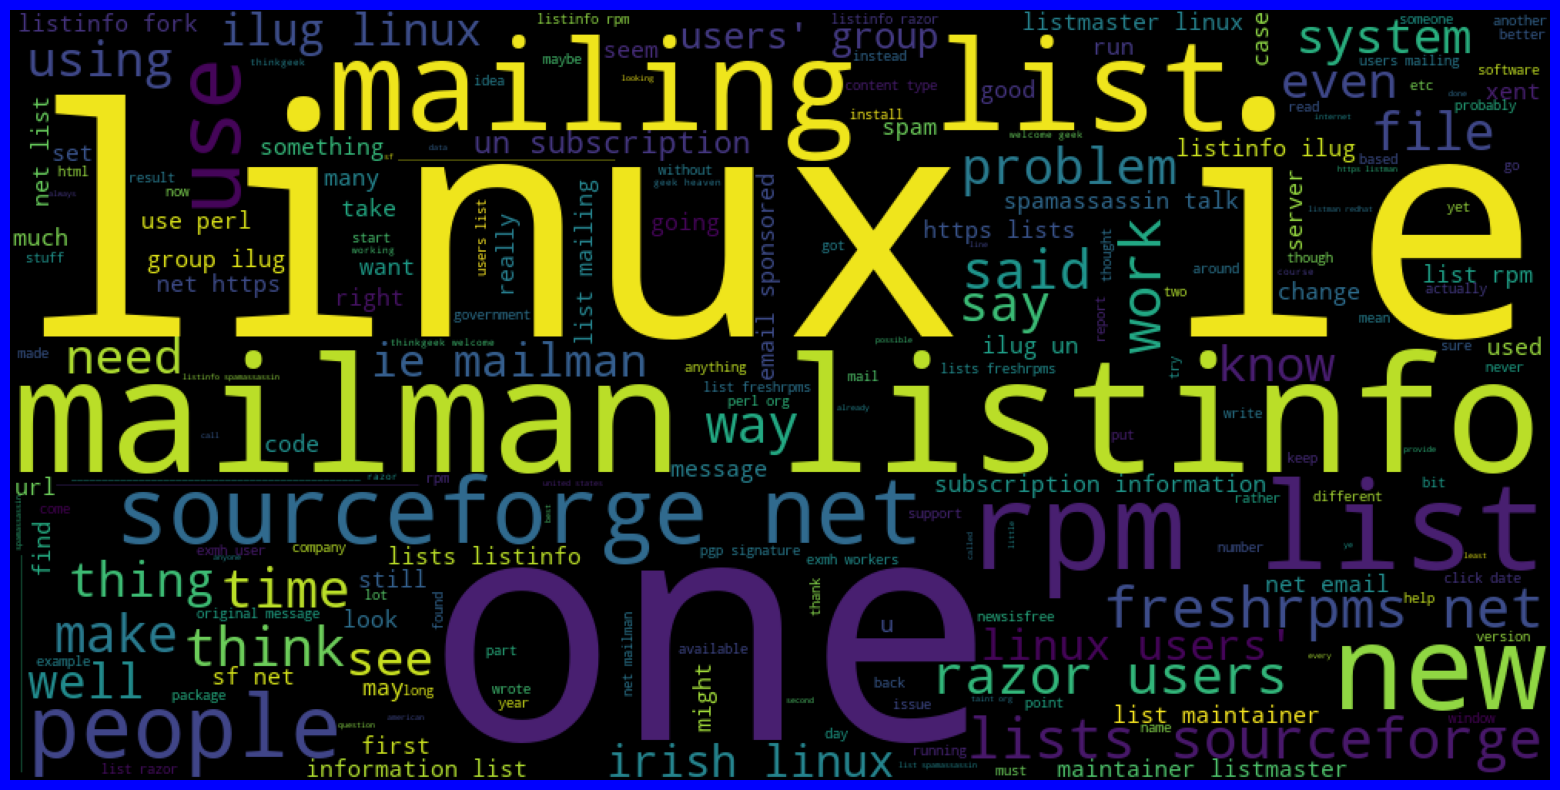

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
ham_cloud=WordCloud(width=1000,height=500).generate(str(' '.join(ham_words)))
plt.figure(figsize=(20,10),facecolor='b')
plt.imshow(ham_cloud)
plt.axis('off')
plt.show()


In [59]:
spam_words=textpreprocess(spam)

In [60]:
print(spam_words[:50],end=' ')

['dear', 'homeowner,', 'interest', 'rates', 'lowest', 'point', '40', 'years!', 'help', 'find', 'best', 'rate', 'situation', 'matching', 'needs', 'hundreds', 'lenders!', 'home', 'improvement,', 'refinance,', 'second', 'mortgage,', 'home', 'equity', 'loans,', 'more!', 'even', 'less', 'perfect', 'credit!', 'service', '100%', 'free', 'home', 'owners', 'new', 'home', 'buyers', 'without', 'obligation.', 'fill', 'quick,', 'simple', 'form', 'jump-start', 'future', 'plans', 'today!', 'visit', 'http://61.145.116.186/user0201/index.asp?afft=qm10'] 

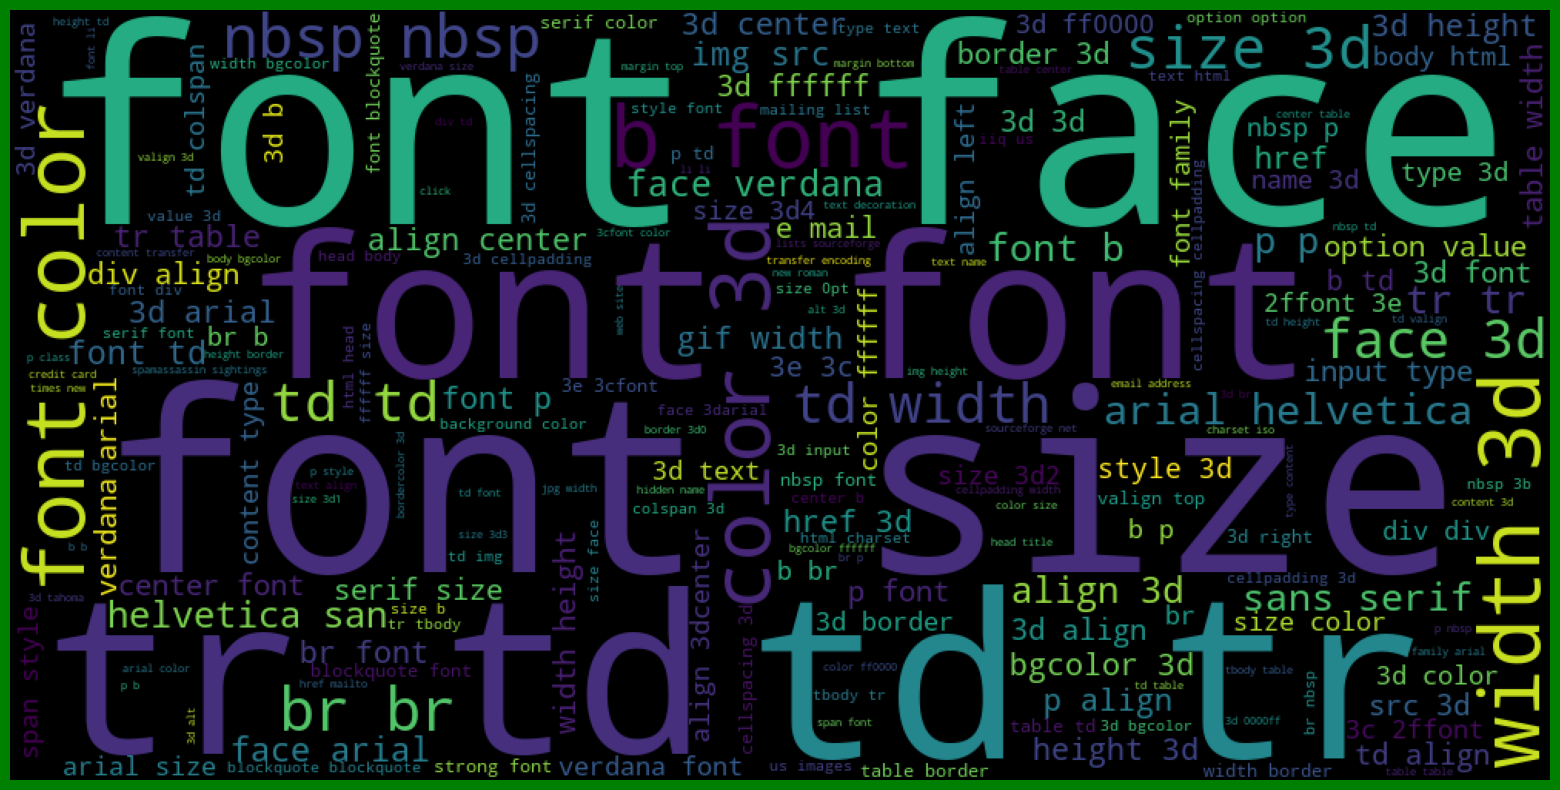

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
spam_cloud=WordCloud(width=1000,height=500).generate(str(' '.join(spam_words)))
plt.figure(figsize=(20,10),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.show()

In [62]:
data['MESSAGE']=data['MESSAGE'].apply(textpreprocess)

In [63]:
data['MESSAGE']=data['MESSAGE'].agg(lambda x:' '.join(map(str,x)))

In [64]:
print(data['MESSAGE'][:11])

0     dear homeowner interest rates lowest point 40 ...
1     attention must computer users newspecial packa...
2     multipart message mime format nextpart0001cdc1...
3     important information new domain names finally...
4     bottom line give away cds free people like 801...
5     nextpart00000b851e06b6ac8586b31 contenttype te...
6     style typetextcss p fontsize 12px color navy s...
7     hr html head titlesecured investements title h...
8     table width600 border20 aligncenter bordercolo...
9     html head meta httpequivcontentlanguage conten...
10    dear consumers increase business sales targeti...
Name: MESSAGE, dtype: object


In [65]:
print(data['MESSAGE'][990:999])

990    doctype html public w3cdtd html 40 transitiona...
991    dear fellow ebay user listed cd ebay months ag...
992    multipart message mime format nextparthzg8dmso...
993    hr html div bgcolor3dffffcc p align3dcentera h...
994    html head meta httpequiv3dcontenttype content3...
995    htmlbody bgcolor3dffffff table width3d400 alig...
996    long time chat youve like youve trying trying ...
997    chinas rapid economic growth ranked world bank...
998    html body font size2 ptsize10 table height338 ...
Name: MESSAGE, dtype: object


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
bow_trans=vectorizer.fit(data['MESSAGE'])
print('Few BOW: ',vectorizer.get_feature_names_out()[1:10])

Few BOW:  ['000' '0000' '000000' '00000000' '000000000000000000'
 '000000000000000000000'
 '000000000000000000000000000000000000000000000000000000000000000'
 '000000000000000000000000000032526amp3b223bbon203d2027273bwith2'
 '000000000000000000000365000000000000000000000000000000000000000003640000']


In [67]:
len(vectorizer.vocabulary_)

123042

In [68]:
vectorizer.vocabulary_

{'dear': 35077,
 'homeowner': 52270,
 'interest': 63821,
 'rates': 88703,
 'lowest': 70308,
 'point': 84708,
 '40': 7214,
 'years': 119641,
 'help': 51339,
 'find': 44200,
 'best': 19786,
 'rate': 88686,
 'situation': 95544,
 'matching': 72118,
 'needs': 77013,
 'hundreds': 60121,
 'lenders': 68402,
 'home': 52204,
 'improvement': 62583,
 'refinance': 89609,
 'second': 93821,
 'mortgage': 74503,
 'equity': 40751,
 'loans': 69874,
 'even': 41365,
 'less': 68466,
 'perfect': 83064,
 'credit': 33358,
 'service': 94463,
 '100': 1535,
 'free': 45739,
 'owners': 81514,
 'new': 77293,
 'buyers': 24442,
 'without': 117672,
 'obligation': 79319,
 'fill': 44126,
 'quick': 87933,
 'simple': 95332,
 'form': 45357,
 'jumpstart': 65992,
 'future': 46477,
 'plans': 84260,
 'today': 107850,
 'visit': 114004,
 'http61145116186user0201indexaspafftqm10': 55819,
 'unsubscribe': 110687,
 'please': 84347,
 'http61145116186lightwatchasp': 55818,
 'attention': 17143,
 'must': 75331,
 'computer': 31734,
 'user

In [69]:
bow=bow_trans.transform(data['MESSAGE'])
print(bow)

  (0, 1535)	1
  (0, 7214)	1
  (0, 19786)	1
  (0, 24442)	1
  (0, 33358)	1
  (0, 35077)	1
  (0, 40751)	1
  (0, 41365)	1
  (0, 44126)	1
  (0, 44200)	1
  (0, 45357)	1
  (0, 45739)	1
  (0, 46477)	1
  (0, 51339)	1
  (0, 52204)	4
  (0, 52270)	1
  (0, 55818)	1
  (0, 55819)	1
  (0, 60121)	1
  (0, 62583)	1
  (0, 63821)	1
  (0, 65992)	1
  (0, 68402)	1
  (0, 68466)	1
  (0, 69874)	1
  :	:
  (5795, 71089)	1
  (5795, 72593)	1
  (5795, 72985)	1
  (5795, 77220)	1
  (5795, 77293)	2
  (5795, 79947)	1
  (5795, 82019)	1
  (5795, 83849)	3
  (5795, 84010)	1
  (5795, 85739)	1
  (5795, 90518)	2
  (5795, 90645)	1
  (5795, 90789)	1
  (5795, 92222)	1
  (5795, 93285)	1
  (5795, 94006)	1
  (5795, 95060)	1
  (5795, 99381)	1
  (5795, 103150)	1
  (5795, 111143)	1
  (5795, 115339)	1
  (5795, 115341)	1
  (5795, 117889)	1
  (5795, 117996)	1
  (5795, 118432)	1


In [70]:
bow.shape

(5796, 123042)

In [71]:
print(bow_trans.get_feature_names_out()[50])

0000ffbfontfont


In [72]:
bow.nnz

702562

In [73]:
from sklearn.model_selection import train_test_split
rev_train,rev_test,sen_train,sen_test=train_test_split(bow,data['CATEGORY'],test_size=0.2)

In [74]:
rev_train.shape

(4636, 123042)

In [75]:
sen_train.shape

(4636,)

In [76]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
sentiment=clf.fit(rev_train,sen_train)
sentiment

MultinomialNB()

In [77]:
prediction=sentiment.predict(rev_train)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
label=sentiment.predict(rev_test)
print(label)

[0 0 0 ... 0 1 0]


In [79]:
import sklearn.metrics
print('Accuracy of the model:{0:0.3f}'.format(sklearn.metrics.accuracy_score(sen_test,label)))

Accuracy of the model:0.972


In [80]:
sample_data=['On Mon, 2002-08-12 at 06:32, Matthias Saou wro...']
sample_data_bow=bow_trans.transform(sample_data)
prediction=sentiment.predict(sample_data_bow)
print(prediction[0])

0
